# **Experiment Notebook**



---
## Setup Environment

In [1]:
# DO NOT MODIFY THE CODE IN THIS CELL
!pip install -q utstd

from utstd.folders import *
from utstd.ipyrenders import *

at = AtFolder(
    course_code=36106,
    assignment="AT1",
)
at.run()

import warnings
warnings.simplefilter(action='ignore')


[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



You can now save your data files in: c:\Users\brohao\Desktop\UTS\36106\AT1\36106\assignment\AT1\data


---
## Student Information


In [2]:
# Student name with space
student_name = "Jiayu Hao"
student_id = "25948860"

In [3]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h1", key='student_name', value=student_name)

In [4]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h1", key='student_id', value=student_id)

---
## 0. Python Packages

### 0.a Install Additional Packages

> If you are using additional packages, you need to install them here using the command: `! pip install <package_name>`

In [5]:
!pip install numpy
!pip install matplot.lib
!pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement matplot.lib (from versions: none)
ERROR: No matching distribution found for matplot.lib

[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### 0.b Import Packages

In [6]:
# DO NOT MODIFY THE CODE IN THIS CELL
import pandas as pd
import altair as alt

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

---
## A. Project Description


In [8]:
# Explain clearly what is the goal of this project for the business. How will the results be used? What will be the impact of accurate or incorrect results?

business_objective = """
The goal of this project is to predict how much customers will pay for their Motor Vehicle Insurance. 
The results will help the company set fair premiums, keep customers, and lower financial risk. 
If predictions are accurate, the company can give fair prices, stay profitable, and keep customers. If predictions are wrong, the company may lose money by charging too little or lose customers by charging too much.
"""

In [9]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='business_objective', value=business_objective)

---
## B. Dataset Understanding (Global Interpretation)

In [10]:
# DO NOT MODIFY THE CODE IN THIS CELL
# Load training data
try:
  training_df = pd.read_csv(at.folder_path / "car_insurance_premium_training.csv")
  validation_df = pd.read_csv(at.folder_path / "car_insurance_premium_validation.csv")
  testing_df = pd.read_csv(at.folder_path / "car_insurance_premium_testing.csv")
except Exception as e:
  print(e)

### B.1 Explore Training Set


> You can add more cells in this section

In [11]:
print("Shape of dataset:", training_df.shape)   # rows * columns
# Overview of data types and non-null counts
print("\nDataset Info:")
print(training_df.info())

# First few rows
print("\nFirst 5 rows of training set:")
pd.set_option("display.max_columns", None)
display(training_df.head())

# SSummary statistics for numerical features
print("\nSummary statistics for numerical variables:")
display(training_df.describe().T)

# Summary for categorical features
print("\nUnique values count for categorical variables:")
categorical_cols = training_df.select_dtypes(include=["object", "category"]).columns
for col in categorical_cols:
    print(f"{col}: {training_df[col].nunique()} unique values")

# Step 8: Missing values
print("\nMissing values per column:")
missing = training_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
display(missing)

# Step 9: Check for duplicate rows
print("\nNumber of duplicate rows:", training_df.duplicated().sum())

Shape of dataset: (32136, 40)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32136 entries, 0 to 32135
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          32136 non-null  object 
 1   prefix                               21345 non-null  object 
 2   first_name                           32136 non-null  object 
 3   last_name                            32116 non-null  object 
 4   gender                               32136 non-null  object 
 5   birth_date                           32136 non-null  object 
 6   driving_license_date                 32136 non-null  object 
 7   phone_number                         32136 non-null  object 
 8   email                                32136 non-null  object 
 9   secondary_address                    32136 non-null  object 
 10  building_number                      32136 non-nu

,customer_id,prefix,first_name,last_name,gender,birth_date,driving_license_date,phone_number,email,secondary_address,building_number,street_name,street_suffix,suburb,contract_start_date,last_renewal_date,next_renewal_date,distribution_channel,seniority,current_policies_held,max_policies_held,max_products_held,lapsed_policies,lapsed_date,payment_method,net_premium_amount,total_claims_cost_in_current_year,total_claims_number_in_current_year,total_claims_number_in_history,total_claims_number_ratio,policy_type,second_driver,matriculation_year,vehicle_horsepower,vehicle_cylinder,vehicle_value,vehicle_doors,vehicle_fuel_type,vehicle_length,vehicle_weight
0,2f4cea69-3806-41b7-b7c2-6039eaac8fae,Mr.,John,Medina,m,1970-12-24,2004-12-21,+61 402 336 520,juanatkinson@example.com,Unit 07,0,Megan Drive,Causeway,Stewartmouth,2024-06-04,2024-06-04,2025-06-04,1,1,1,1,1,0,NaN,1,555.0,51.95,1,1,2.04,3,0,2006,88,1386,14600.0,3,P,3.719,998
1,c738e8cb-13fe-43f9-8d59-b501b04ff590,Dr.,Krystal,Howard,f,1989-02-07,2008-02-20,0412-996-143,mossapril@example.net,Suite 015,5,Kristy Piazza,Link,Ariastown,2020-11-20,2024-11-20,2025-11-20,0,6,2,2,1,0,NaN,0,605.0,0.00,0,4,0.00,1,0,2014,115,847,9799.0,0,P,NaN,193
2,685c81d7-b1de-4862-902e-f57612dedb57,Mr.,Jeffrey,Craig,m,1972-08-29,2001-12-08,0790583464,juliamcdaniel@example.org,596/,13,Lorraine Dip,Run,Douglasside,2020-10-02,2022-10-02,2023-10-02,1,3,2,2,1,1,2022-10-02,0,551.0,0.00,0,2,1.00,3,1,2001,75,1360,14760.0,5,P,4.188,1116
3,643be7d5-6ffa-4517-8468-85bfe5e01bde,Mr.,Gregory,Ortiz,m,1983-01-01,2013-09-25,(03) 9638 9041,ncoleman@example.com,Level 7,5,Shawn Break,Port,New Kimberly,2024-04-03,2024-04-03,2025-04-03,0,1,1,1,1,0,NaN,0,625.0,0.00,0,0,0.00,3,0,2001,90,1753,17480.0,4,D,4.382,1213
4,99c498eb-33de-479b-88ec-b5b9d6d5252b,Mr.,Donald,Harrison,m,1960-07-16,1999-06-30,+61-2-6857-3943,parksashley@example.com,8/,662,Thomas Alleyway,Boulevard,North James,2021-02-11,2024-02-11,2025-02-11,1,4,1,1,1,0,NaN,1,576.0,0.00,0,3,0.53,3,0,1999,90,1997,17805.0,5,D,4.188,1200



Summary statistics for numerical variables:


,count,mean,std,min,25%,50%,75%,max
building_number,32136.0,185.629792,280.506483,0.00,6.000,45.000,255.000,999.000
seniority,32136.0,5.896596,5.909002,1.00,2.000,4.000,7.000,40.000
current_policies_held,32136.0,1.443055,0.943590,1.00,1.000,1.000,2.000,17.000
max_policies_held,32136.0,1.796023,1.157598,1.00,1.000,1.000,2.000,17.000
max_products_held,32136.0,1.048015,0.231683,1.00,1.000,1.000,1.000,4.000
lapsed_policies,32136.0,0.391804,0.550027,0.00,0.000,0.000,1.000,7.000
payment_method,32136.0,0.361433,0.480423,0.00,0.000,0.000,1.000,1.000
net_premium_amount,32136.0,579.367438,44.991023,460.00,542.000,575.000,614.000,676.000
total_claims_cost_in_current_year,32136.0,104.826855,1110.840111,0.00,0.000,0.000,0.000,128809.730
total_claims_number_in_current_year,32136.0,0.206622,0.771437,0.00,0.000,0.000,0.000,15.000



Unique values count for categorical variables:
customer_id: 32136 unique values
prefix: 5 unique values
first_name: 1321 unique values
last_name: 2446 unique values
gender: 3 unique values
birth_date: 14183 unique values
driving_license_date: 11691 unique values
phone_number: 32136 unique values
email: 30167 unique values
secondary_address: 3270 unique values
street_name: 27443 unique values
street_suffix: 200 unique values
suburb: 18887 unique values
contract_start_date: 4963 unique values
last_renewal_date: 1117 unique values
next_renewal_date: 1117 unique values
distribution_channel: 3 unique values
lapsed_date: 1200 unique values
vehicle_fuel_type: 2 unique values

Missing values per column:


lapsed_date          19569
prefix               10791
vehicle_length         685
vehicle_fuel_type       78
last_name               20
dtype: int64


Number of duplicate rows: 0


In [12]:

training_set_insights = """
The dataset has 32,136 rows and 40 columns, including 3 types information(customer, policy, and vehicle information). 
Several columns are identifiers or personal details(IDs, names, contact info, addresses). Those columns will be dropped. 
Missing values exist mainly in lapsed_date(61%), prefix(34%), and a few vehicle information(vehicle_length, vehicle_fuel_type). 

Numerical issues: 
Outliers: total_claims_cost_in_current_year(mean: 105, max:128, 000). 
Invalid values (e.g., vehicle_doors=0, vehicle_weight=55, vehicle_horsepower=0). 
Skewed variables (claims cost(exist outlier), vehicle_value). 

Categorical variables: gender, policy_type, vehicle_fuel_type, and distribution_channel will be encoded. Some columns may be not useful. 
Dates(birth_date, driving_license_date, matriculation_year) will be transformed into derived features such as age, driving experience, and car age.
"""

In [13]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='training_set_insights', value=training_set_insights)

### B.2 Explore Validation Set

> You can add more cells in this section

In [14]:
print("Shape of dataset:", validation_df.shape)   # rows * columns

# Overview of data types and non-null counts
print("\nDataset Info:")
print(validation_df.info())

# First few rows
print("\nFirst 5 rows of validation set:")
pd.set_option("display.max_columns", None)
display(validation_df.head())

# Summary statistics for numerical features
print("\nSummary statistics for numerical variables:")
display(validation_df.describe().T)

# Summary for categorical features
print("\nUnique values count for categorical variables:")
categorical_cols = validation_df.select_dtypes(include=["object", "category"]).columns
for col in categorical_cols:
    print(f"{col}: {validation_df[col].nunique()} unique values")

# Missing values
print("\nMissing values per column:")
missing = validation_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
display(missing)

# Duplicate rows
print("\nNumber of duplicate rows:", validation_df.duplicated().sum())

Shape of dataset: (10700, 40)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10700 entries, 0 to 10699
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          10700 non-null  object 
 1   prefix                               7078 non-null   object 
 2   first_name                           10700 non-null  object 
 3   last_name                            10696 non-null  object 
 4   gender                               10700 non-null  object 
 5   birth_date                           10700 non-null  object 
 6   driving_license_date                 10700 non-null  object 
 7   phone_number                         10700 non-null  object 
 8   email                                10700 non-null  object 
 9   secondary_address                    10700 non-null  object 
 10  building_number                      10700 non-nu

,customer_id,prefix,first_name,last_name,gender,birth_date,driving_license_date,phone_number,email,secondary_address,building_number,street_name,street_suffix,suburb,contract_start_date,last_renewal_date,next_renewal_date,distribution_channel,seniority,current_policies_held,max_policies_held,max_products_held,lapsed_policies,lapsed_date,payment_method,net_premium_amount,total_claims_cost_in_current_year,total_claims_number_in_current_year,total_claims_number_in_history,total_claims_number_ratio,policy_type,second_driver,matriculation_year,vehicle_horsepower,vehicle_cylinder,vehicle_value,vehicle_doors,vehicle_fuel_type,vehicle_length,vehicle_weight
0,980657d0-843c-4006-abcb-aa6a44ad57f1,NaN,Veronica,Simpson,u,1982-08-12,2000-09-21,56009838,andrea96@example.com,Suite 649,29,Cervantes Ridgeway,State Highway,West Yesenia,2001-08-09,2024-08-09,2025-08-09,0,24,1,1,1,0,NaN,0,344.0,0.0,0,0,0.0,4,0,1995,81,4525,42920.00,0,D,NaN,4525
1,f50db3af-dfae-496a-8aaf-14b0ea2729e2,Dr.,Carla,Riley,f,1976-12-09,1994-12-23,+61 479 194 344,rayala@example.net,33/,0,Derrick Deviation,Path,Rayport,2022-08-01,2022-08-01,2023-08-01,1,1,3,3,1,0,2022-12-09,0,391.0,0.0,0,0,0.0,1,0,2015,30,278,5599.00,0,P,NaN,192
2,d32a95a8-3ed8-4a98-a54a-472dd480f6fa,NaN,Brian,Branch,u,1948-06-25,1970-04-11,(07).9637.5336,thomas81@example.net,Apt. 327,467,Stephanie Parklands,Triangle,Brandonchester,2023-05-30,2024-05-30,2025-05-30,0,2,5,5,1,2,2024-05-30,0,330.0,0.0,0,0,0.0,3,0,1970,25,998,6611.13,2,P,3.058,615
3,ba0d15a9-0792-44a2-87d3-05f45c1c046d,Dr.,Drew,Smith,m,1974-09-21,1994-09-21,02.4989.1186,martinstephanie@example.net,Suite 670,93,Wallace Street,Byway,North Raymondfurt,2024-10-29,2024-10-29,2025-10-29,0,3,4,4,1,0,NaN,0,310.0,0.0,0,1,0.0,3,0,2004,87,1560,19120.00,5,P,4.276,1228
4,e0da2a4b-fa0f-4512-a363-780d1f8e2b0e,Mr.,Jose,Watson,m,1961-06-26,2014-08-01,(07).7515.5599,robinthompson@example.org,68/,4,Adams River,Edge,Port Hannahview,2021-11-10,2024-11-10,2025-11-10,0,4,1,1,1,0,NaN,0,391.0,0.0,0,0,0.0,1,0,2000,4,49,1899.00,0,P,NaN,78



Summary statistics for numerical variables:


,count,mean,std,min,25%,50%,75%,max
building_number,10700.0,185.951776,280.713477,0.000,6.000,44.000,261.00,999.00
seniority,10700.0,6.120374,6.444548,1.000,2.000,3.000,8.00,39.00
current_policies_held,10700.0,1.756449,1.268339,1.000,1.000,1.000,2.00,17.00
max_policies_held,10700.0,2.082991,1.410385,1.000,1.000,2.000,3.00,17.00
max_products_held,10700.0,1.108411,0.336329,1.000,1.000,1.000,1.00,4.00
lapsed_policies,10700.0,0.315327,0.558235,0.000,0.000,0.000,1.00,6.00
payment_method,10700.0,0.161682,0.368176,0.000,0.000,0.000,0.00,1.00
net_premium_amount,10700.0,489.297009,133.399129,309.000,396.000,479.000,500.00,868.00
total_claims_cost_in_current_year,10700.0,87.516426,2356.273613,0.000,0.000,0.000,0.00,236285.18
total_claims_number_in_current_year,10700.0,0.156822,0.659318,0.000,0.000,0.000,0.00,12.00



Unique values count for categorical variables:
customer_id: 10700 unique values
prefix: 5 unique values
first_name: 1017 unique values
last_name: 1624 unique values
gender: 3 unique values
birth_date: 7528 unique values
driving_license_date: 6625 unique values
phone_number: 10700 unique values
email: 10445 unique values
secondary_address: 2516 unique values
street_name: 10139 unique values
street_suffix: 200 unique values
suburb: 8240 unique values
contract_start_date: 3116 unique values
last_renewal_date: 1056 unique values
next_renewal_date: 1056 unique values
distribution_channel: 3 unique values
lapsed_date: 1027 unique values
vehicle_fuel_type: 2 unique values

Missing values per column:


lapsed_date          7613
prefix               3622
vehicle_length       3439
vehicle_fuel_type     619
last_name               4
dtype: int64


Number of duplicate rows: 0


In [15]:
# provide a detailed analysis on the validation set, its dimensions, information, issues, ...
validation_set_insights = """
The validation set has 10,700 rows and 40 columns, same structure as training. 
Premiums are lower on average (mean ≈ 489) and show more variation. 
Some variables have many missing values (lapsed_date, prefix, vehicle_length).
several contain outliers (e.g., very high claims, unusual vehicle specs). 
Data quality issues are similar to training and need the same cleaning. 
Overall, the set is consistent and suitable for model evaluation.
"""

In [16]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='validation_set_insights', value=validation_set_insights)

### B.3 Explore Testing Set

> You can add more cells in this section

In [17]:
print("Shape of dataset:", testing_df.shape)   # rows * columns

# Overview of data types and non-null counts
print("\nDataset Info:")
print(testing_df.info())

# First few rows
print("\nFirst 5 rows of testing set:")
pd.set_option("display.max_columns", None)
display(testing_df.head())

# Summary statistics for numerical features
print("\nSummary statistics for numerical variables:")
display(testing_df.describe().T)

# Summary for categorical features
print("\nUnique values count for categorical variables:")
categorical_cols = testing_df.select_dtypes(include=["object", "category"]).columns
for col in categorical_cols:
    print(f"{col}: {testing_df[col].nunique()} unique values")

# Missing values
print("\nMissing values per column:")
missing = testing_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
display(missing)

# Duplicate rows
print("\nNumber of duplicate rows:", testing_df.duplicated().sum())

Shape of dataset: (10666, 40)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10666 entries, 0 to 10665
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          10666 non-null  object 
 1   prefix                               7039 non-null   object 
 2   first_name                           10666 non-null  object 
 3   last_name                            10665 non-null  object 
 4   gender                               10666 non-null  object 
 5   birth_date                           10666 non-null  object 
 6   driving_license_date                 10666 non-null  object 
 7   phone_number                         10666 non-null  object 
 8   email                                10666 non-null  object 
 9   secondary_address                    10666 non-null  object 
 10  building_number                      10666 non-nu

,customer_id,prefix,first_name,last_name,gender,birth_date,driving_license_date,phone_number,email,secondary_address,building_number,street_name,street_suffix,suburb,contract_start_date,last_renewal_date,next_renewal_date,distribution_channel,seniority,current_policies_held,max_policies_held,max_products_held,lapsed_policies,lapsed_date,payment_method,net_premium_amount,total_claims_cost_in_current_year,total_claims_number_in_current_year,total_claims_number_in_history,total_claims_number_ratio,policy_type,second_driver,matriculation_year,vehicle_horsepower,vehicle_cylinder,vehicle_value,vehicle_doors,vehicle_fuel_type,vehicle_length,vehicle_weight
0,08630f39-3b19-4c50-aaac-6cbb5d63b820,Mr.,Jose,Fritz,m,1998-07-15,2016-11-22,+61.7.5289.3484,sarah53@example.com,Suite 250,21,Benjamin Spur,Dell,Robertstad,2024-09-16,2024-09-16,2025-09-16,0,1,1,1,1,0,NaN,1,902.0,0.00,0,0,0.00,3,0,2015,184,1968,27430.0,5,D,4.543,1415
1,e491ab7e-a3df-474d-a6d5-9cbd85dc4242,NaN,Eric,Wilson,u,1992-05-12,2010-11-05,8127 5862,thomas93@example.com,9/,4,Grant Dell,Corner,Allenbury,2023-01-26,2024-01-26,2025-01-26,1,9,3,3,1,0,NaN,1,878.0,315.13,1,6,1.08,3,1,2004,100,1968,38170.0,5,D,4.426,1651
2,6bafa529-bdc5-442f-b96f-eb5120799054,Mr.,Parker,Burton,m,1957-04-07,1977-04-24,0463.525.878,vickiwallace@example.com,59/,9,Andrea Quadrant,Intersection,Deannafurt,2023-10-04,2024-10-04,2025-10-04,0,2,1,1,1,0,NaN,0,1133.0,0.00,0,0,0.00,3,0,2016,258,2987,81200.0,5,D,4.900,2250
3,aea650ed-62e6-4b69-99b3-04fe84f60354,NaN,Matthew,Bonilla,u,1981-04-14,2008-03-14,+61.477.379.323,betty21@example.org,Suite 404,1,Linda Interchange,Glade,Katherineton,2020-11-25,2021-11-25,2022-11-25,1,5,1,3,1,0,2022-11-25,1,924.0,1335.61,1,3,1.00,3,1,2011,112,1560,24750.0,4,D,4.779,1506
4,fb24f594-dc26-4cb5-8fdc-c8568b3c72ea,Mrs.,Sarah,Holloway,f,1974-08-01,1992-09-29,0411 958 042,qmonroe@example.net,589/,43,Brenda Parklands,Basin,Port Kiarachester,2022-03-29,2022-03-29,2023-03-29,1,2,1,1,1,0,2023-03-29,0,1240.0,75.87,2,2,2.00,3,1,2015,110,1598,26400.0,5,D,4.310,1315



Summary statistics for numerical variables:


,count,mean,std,min,25%,50%,75%,max
building_number,10666.0,186.816801,281.124963,0.00,6.000,43.00,267.000,999.000
seniority,10666.0,5.153666,5.258575,1.00,2.000,3.00,6.000,40.000
current_policies_held,10666.0,1.483218,0.966358,1.00,1.000,1.00,2.000,16.000
max_policies_held,10666.0,1.828146,1.166254,1.00,1.000,2.00,2.000,17.000
max_products_held,10666.0,1.056722,0.245481,1.00,1.000,1.00,1.000,3.000
lapsed_policies,10666.0,0.429402,0.565399,0.00,0.000,0.00,1.000,7.000
payment_method,10666.0,0.450778,0.497595,0.00,0.000,0.00,1.000,1.000
net_premium_amount,10666.0,773.221733,212.915798,397.00,694.000,737.00,869.000,2970.000
total_claims_cost_in_current_year,10666.0,184.485467,1288.970159,0.00,0.000,0.00,0.000,59656.650
total_claims_number_in_current_year,10666.0,0.267110,0.899549,0.00,0.000,0.00,0.000,18.000



Unique values count for categorical variables:
customer_id: 10666 unique values
prefix: 5 unique values
first_name: 1025 unique values
last_name: 1664 unique values
gender: 3 unique values
birth_date: 7753 unique values
driving_license_date: 6827 unique values
phone_number: 10666 unique values
email: 10448 unique values
secondary_address: 2542 unique values
street_name: 10127 unique values
street_suffix: 200 unique values
suburb: 8226 unique values
contract_start_date: 2805 unique values
last_renewal_date: 1095 unique values
next_renewal_date: 1095 unique values
distribution_channel: 3 unique values
lapsed_date: 1111 unique values
vehicle_fuel_type: 2 unique values

Missing values per column:


lapsed_date          6127
prefix               3627
vehicle_length       1018
vehicle_fuel_type     160
last_name               1
dtype: int64


Number of duplicate rows: 0


In [18]:
# provide a detailed analysis on the testing set, its dimensions, information, issues, ...
testing_set_insights = """
The testing set has 10,666 rows and 40 columns, consistent with training and validation. 
Average premium is higher (mean ≈ 773) and shows more variability compared to other sets. 
Several variables contain missing values, most notably lapsed_date (~57%), prefix (~34%), and vehicle_length (~10%). 
Outliers exist in claims (e.g. very high costs), vehicle specs (e.g. horsepower up to 580, value > 200k), and unrealistic cases (vehicle_doors=0). 
Despite these issues, the structure matches the other datasets, making it suitable for final performance evaluation after consistent preprocessing.
"""

In [19]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='testing_set_insights', value=testing_set_insights)

---
## C. Feature Understanding (Local Interpretation)

### C.1 Explore Target Variable

> Save the name of column used as the target variable and call it `target_name`

> You can add more cells in this section

In [20]:
# Target name
target_name = 'net_premium_amount'

Target Variable: net_premium_amount
count    32136.000000
mean       579.367438
std         44.991023
min        460.000000
25%        542.000000
50%        575.000000
75%        614.000000
max        676.000000
Name: net_premium_amount, dtype: float64


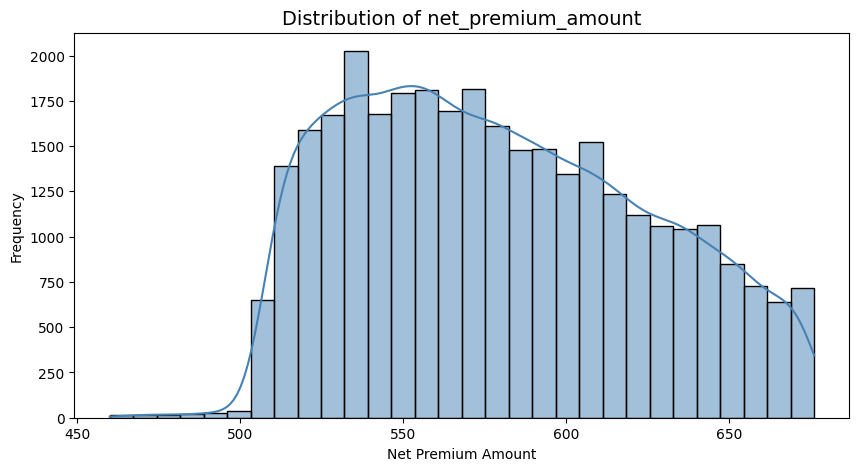

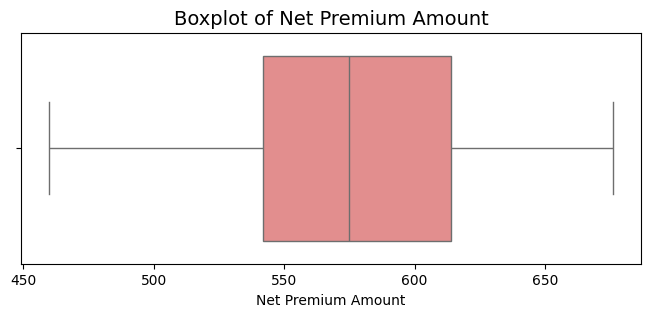

In [21]:
# Basic statistics
target = training_df[target_name]
print("Target Variable: net_premium_amount")
print(target.describe())

# Histogram + KDE
plt.figure(figsize=(10,5))
sns.histplot(target, bins=30, kde=True, color="steelblue")
plt.title("Distribution of net_premium_amount", fontsize=14)
plt.xlabel("Net Premium Amount")
plt.ylabel("Frequency")
plt.show()

# Boxplot (to check for outliers)
plt.figure(figsize=(8,3))
sns.boxplot(x=target, color="lightcoral")
plt.title("Boxplot of Net Premium Amount", fontsize=14)
plt.xlabel("Net Premium Amount")
plt.show()

In [22]:
# provide a detailed analysis on the target variable, its distribution, limitations, issues, ...
target_insights = """
The target variable net_premium_amount ranges from 460 to 676, with a mean of about 579 and a small standard deviation (~45). 
Its distribution is relatively narrow and right-skewed, most values of target variable concentrate between 540 and 615. 
This limited variability means even small errors (e.g., ±20) are significant compared to the premium scale. 
No extreme outliers are observed, means the premium scale need to be limited strictly.
"""

In [23]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='target_insights', value=target_insights)

### C.2 Explore Feature of Interest `birth_date`

> You can add more cells in this section

In [24]:
feature_name = "birth_date"           # Birthday
ref_date_col = "contract_start_date"  # Contract start date
target_name  = "net_premium_amount"   # Target variable
print_feature_name = "age (at contract start)"

Feature: birth_date -> age (at contract start)
count    32136.000000
mean        43.933408
std         12.497067
min         18.000000
1%          20.350000
5%          26.000000
25%         34.000000
50%         43.000000
75%         53.000000
95%         66.000000
99%         73.000000
max         91.000000
dtype: float64


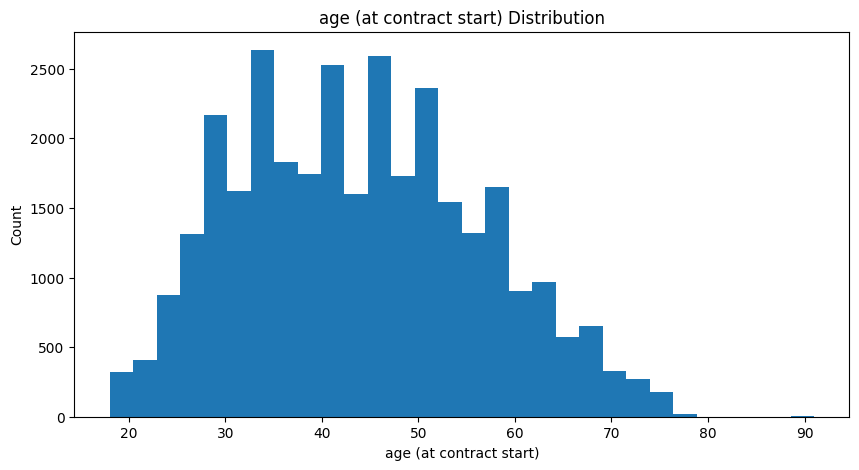

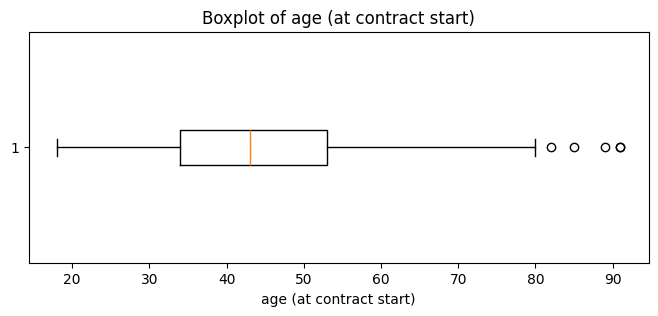

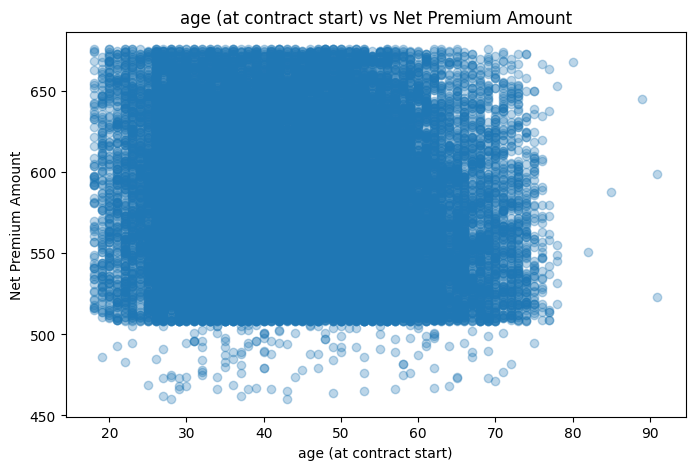

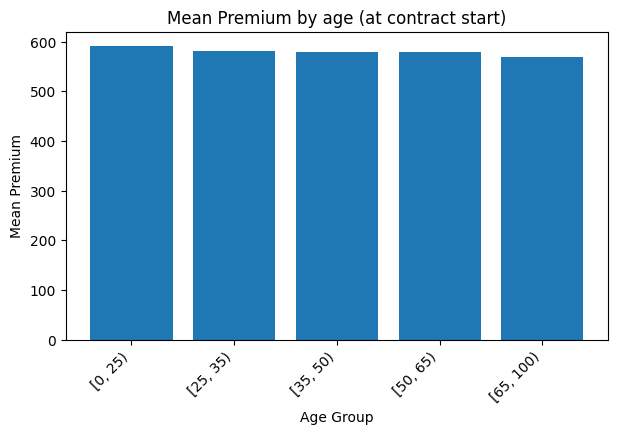

In [25]:
# Parse datetimes
birth = pd.to_datetime(training_df[feature_name], errors="coerce")
contract_start = pd.to_datetime(training_df[ref_date_col], errors="coerce")

# Compute age (years) at contract start
year_diff = contract_start.dt.year - birth.dt.year
before_birthday = (
    (contract_start.dt.month < birth.dt.month) |
    ((contract_start.dt.month == birth.dt.month) & (contract_start.dt.day < birth.dt.day))
)
age_at_contract = year_diff - before_birthday.astype(int)
age_at_contract = age_at_contract.where(birth.notna() & contract_start.notna(), np.nan)

# Basic stat
print(f"Feature: {feature_name} -> {print_feature_name}")
print(age_at_contract.describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]))

# Reasonableness checks
if (age_at_contract < 0).any():
    print("Warning: Negative ages found.")
if (age_at_contract < 16).any():
    print("Warning: Ages < 16 detected.")
if (age_at_contract > 100).any():
    print("Warning: Ages > 100 detected.")

# Distribution plots
valid_age = age_at_contract.dropna()
plt.figure(figsize=(10,5))
plt.hist(valid_age, bins=30)
plt.title(f"{print_feature_name} Distribution")
plt.xlabel(f"{print_feature_name}")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,3))
plt.boxplot(valid_age, vert=False)
plt.title(f"Boxplot of {print_feature_name}")
plt.xlabel(f"{print_feature_name}")
plt.show()

# Relationship with target
df_plot = pd.DataFrame({"Age_at_Contract": age_at_contract, target_name: training_df[target_name]}).dropna()
# Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(df_plot["Age_at_Contract"], df_plot[target_name], alpha=0.3)
plt.title(f"{print_feature_name} vs Net Premium Amount")
plt.xlabel(f"{print_feature_name}")
plt.ylabel("Net Premium Amount")
plt.show()

# Grouped averages
df_plot["Age_group"] = pd.cut(df_plot["Age_at_Contract"], bins=[0,25,35,50,65,100], right=False)
mean_prem = df_plot.groupby("Age_group")[target_name].mean()

plt.figure(figsize=(7,4))
plt.bar(mean_prem.index.astype(str), mean_prem.values)
plt.title(f"Mean Premium by {print_feature_name}")
plt.ylabel("Mean Premium"); plt.xlabel("Age Group")
plt.xticks(rotation=45, ha="right")
plt.show()

In [26]:
# provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...
feature_1_insights = """
Age distribution from 18-elder(90+), right-skewed toward middle-aged drivers. 
Younger drivers are usually higher risk -> higher premiums; older drivers may have mixed risk depending on some other features.
Issues: the original data 'birth_date'(string) must be converted to age(at contract start).
It's continuous variable.
"""

In [27]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### C.3 Explore Feature of Interest `driving_license_date`

> You can add more cells in this section

In [28]:
feature_name        = "driving_license_date"         # License issue date
ref_date_col        = "contract_start_date"          # Reference date (contract start)
target_name         = "net_premium_amount"           # Target variable
print_feature_name  = "Driving Experience (years) at Contract Start"

Feature: driving_license_date -> Driving Experience (years) at Contract Start
count    32136.000000
mean        21.090864
std         12.114187
min        -13.000000
1%           0.000000
5%           4.000000
25%         11.000000
50%         20.000000
75%         30.000000
95%         43.000000
99%         50.000000
max         71.000000
dtype: float64


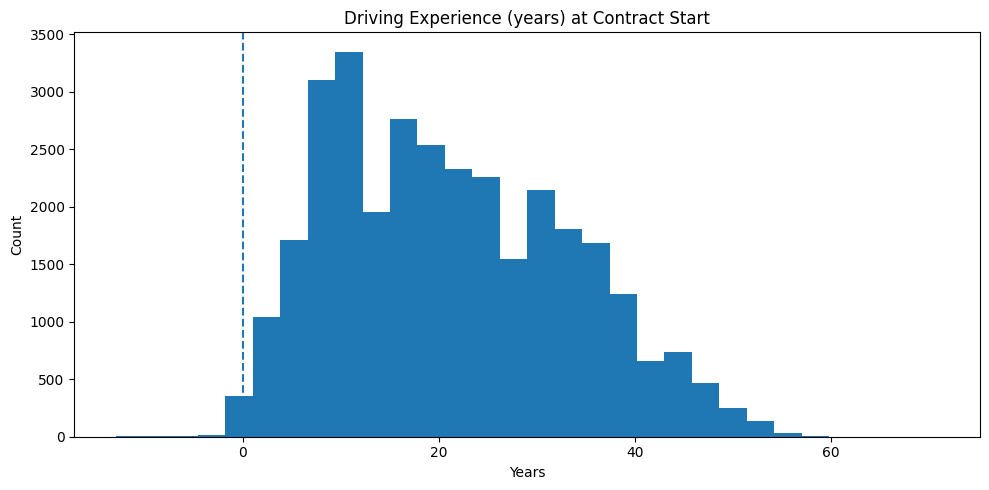

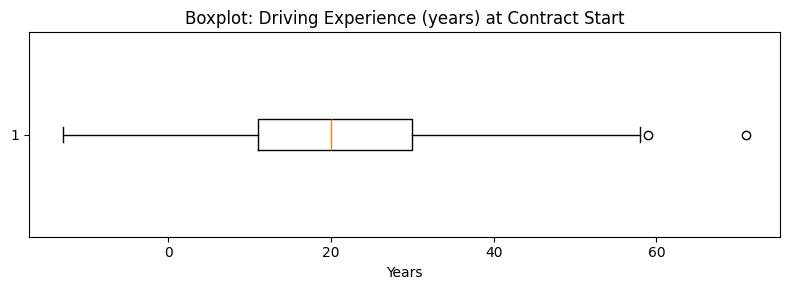

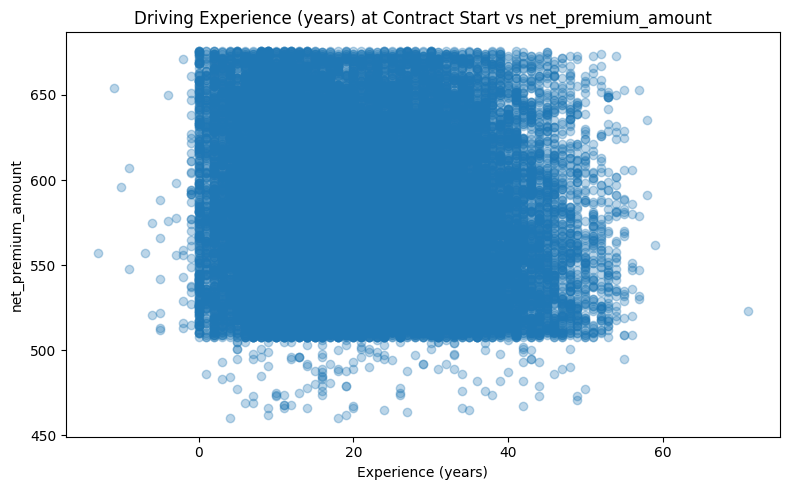

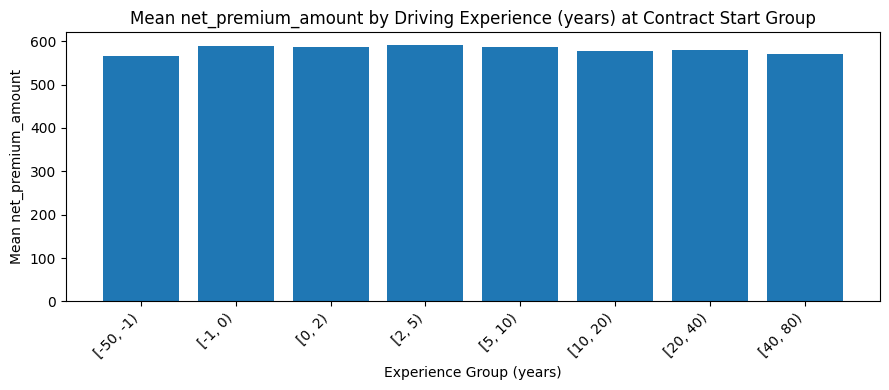

In [29]:
# Parse datetimes
lic = pd.to_datetime(training_df[feature_name], errors="coerce")
ref = pd.to_datetime(training_df[ref_date_col], errors="coerce")

# Compute driving experience (years) at contract start (allow negatives)
year_diff = ref.dt.year - lic.dt.year
before_anniv = (
    (ref.dt.month < lic.dt.month) |
    ((ref.dt.month == lic.dt.month) & (ref.dt.day < lic.dt.day))
)
exp_years = (year_diff - before_anniv.astype(int)).where(lic.notna() & ref.notna(), np.nan)

# Descriptive statistics
print(f"Feature: {feature_name} -> {print_feature_name}")
print(exp_years.describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]))

# Distribution plots (include negatives)
valid = exp_years.dropna()
if len(valid) > 0:
    plt.figure(figsize=(10,5))
    plt.hist(valid, bins=30)
    plt.title(print_feature_name)
    plt.xlabel("Years"); plt.ylabel("Count")
    plt.axvline(0, linestyle="--")  # reference line at 0 year (optional)
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(8,3))
    plt.boxplot(valid, vert=False)
    plt.title(f"Boxplot: {print_feature_name}")
    plt.xlabel("Years")
    plt.tight_layout(); plt.show()

# Relationship with target
df_plot = pd.DataFrame({"Experience": exp_years, target_name: training_df[target_name]}).dropna()

# Scatter
plt.figure(figsize=(8,5))
plt.scatter(df_plot["Experience"], df_plot[target_name], alpha=0.3)
plt.title(f"{print_feature_name} vs {target_name}")
plt.xlabel("Experience (years)"); plt.ylabel(target_name)
plt.tight_layout(); plt.show()

# Grouped averages (bins include negatives)
# Adjust bins as needed for your data distribution
lo, hi = np.nanpercentile(df_plot["Experience"], [1, 99])
bins = [-50, -1, 0, 2, 5, 10, 20, 40, max(80, hi)]
df_plot["ExpGroup"] = pd.cut(df_plot["Experience"], bins=bins, right=False)
mean_prem = df_plot.groupby("ExpGroup")[target_name].mean()

plt.figure(figsize=(9,4))
plt.bar(mean_prem.index.astype(str), mean_prem.values)
plt.title(f"Mean {target_name} by {print_feature_name} Group")
plt.ylabel(f"Mean {target_name}"); plt.xlabel("Experience Group (years)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.show()

In [30]:
# provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

feature_2_insights = """
Driving Experience (years) at Contract Start derived from driving_license_date, has an average of ~21 years, with most customers between 11 and 30 years. 
While it is highly relevant for assessing risk, the data contains negative values and extreme outliers that indicate quality issues. 
These anomalies should be treated carefully before using the feature in models.
"""

In [31]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### C.4 Explore Feature of Interest `seniority`

> You can add more cells in this section

In [32]:
feature_name       = "seniority"             # Years associated with the insurer
ref_date_col       = "contract_start_date"   # Reference date column (parsed for cohort views if needed)
target_name        = "net_premium_amount"    # Target variable
print_feature_name = "Customer Seniority (years) with the Insurer"

Feature: seniority -> Customer Seniority (years) with the Insurer
count    32136.000000
mean         5.896596
std          5.909002
min          1.000000
1%           1.000000
5%           1.000000
25%          2.000000
50%          4.000000
75%          7.000000
95%         19.000000
99%         29.000000
max         40.000000
Name: seniority, dtype: float64


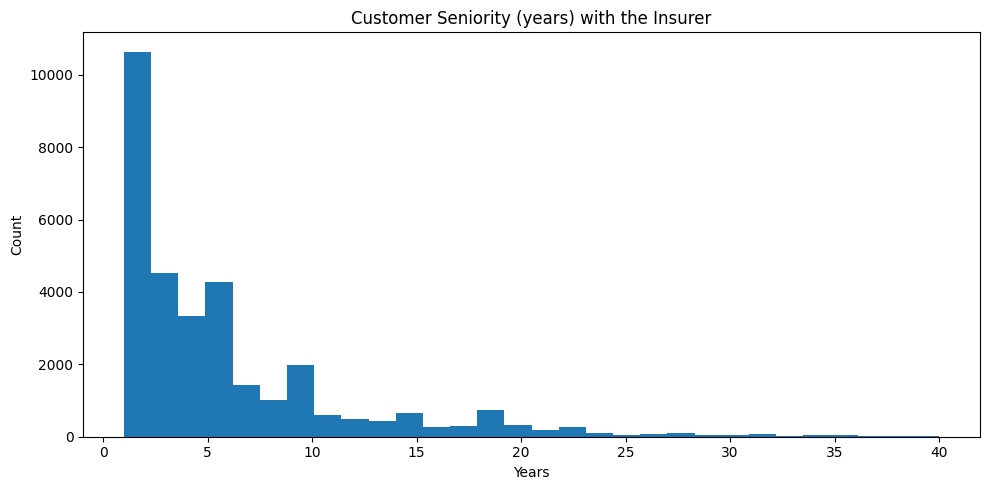

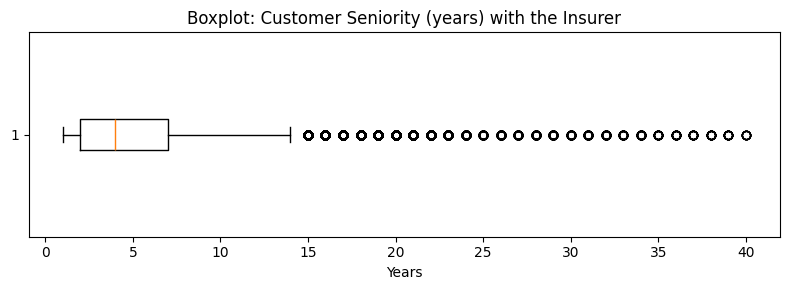

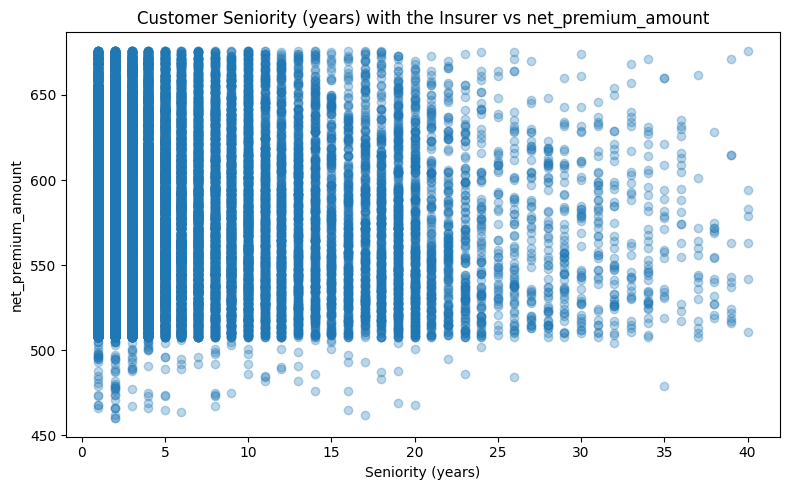

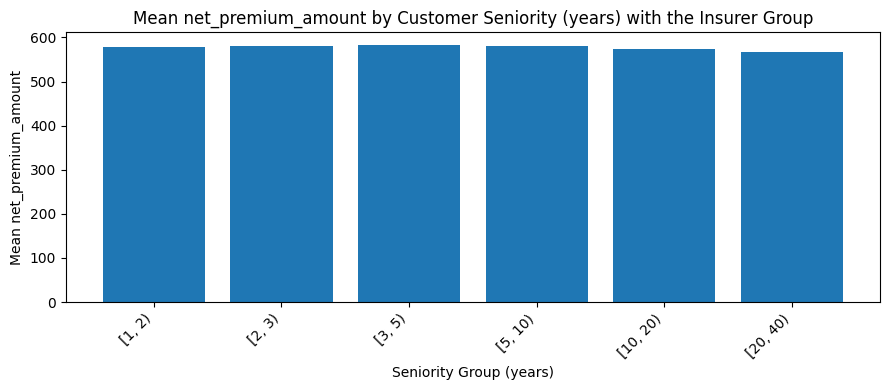

In [33]:
# Prepare data
sen = pd.to_numeric(training_df[feature_name], errors="coerce")
ref_dt = pd.to_datetime(training_df[ref_date_col], errors="coerce")  # kept for potential cohort analysis

# Descriptive statistics
print(f"Feature: {feature_name} -> {print_feature_name}")
print(sen.describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]))

# Quick sanity notes (no hard filtering)
if (sen < 0).any():  print("Note: Negative seniority values exist (data quality).")
if (sen > 50).any(): print("Note: Very large seniority values (>50) exist (check plausibility).")

# Distribution plots
valid = sen.dropna()
if len(valid) > 0:
    plt.figure(figsize=(10,5))
    plt.hist(valid, bins=30)
    plt.title(print_feature_name)
    plt.xlabel("Years"); plt.ylabel("Count")
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(8,3))
    plt.boxplot(valid, vert=False)
    plt.title(f"Boxplot: {print_feature_name}")
    plt.xlabel("Years")
    plt.tight_layout(); plt.show()

# Relationship with target (scatter + grouped averages)
df_plot = pd.DataFrame({ "Seniority": sen, target_name: training_df[target_name] }).dropna()

# Scatter
plt.figure(figsize=(8,5))
plt.scatter(df_plot["Seniority"], df_plot[target_name], alpha=0.3)
plt.title(f"{print_feature_name} vs {target_name}")
plt.xlabel("Seniority (years)"); plt.ylabel(target_name)
plt.tight_layout(); plt.show()

# Grouped averages (bins can be adjusted)
# Uses broader bins to stabilize means across skewed counts
lo, hi = np.nanpercentile(df_plot["Seniority"], [1, 99])
bins = [0, 1, 2, 3, 5, 10, 20, max(40, hi)]
df_plot["SenGroup"] = pd.cut(df_plot["Seniority"], bins=bins, right=False, include_lowest=True)
mean_prem = df_plot.groupby("SenGroup")[target_name].mean()

plt.figure(figsize=(9,4))
plt.bar(mean_prem.index.astype(str), mean_prem.values)
plt.title(f"Mean {target_name} by {print_feature_name} Group")
plt.ylabel(f"Mean {target_name}"); plt.xlabel("Seniority Group (years)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.show()

In [34]:
# provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

feature_3_insights = """
Seniority (years) has an average of about 6 years, with most customers between 2 and 7 years. 
The distribution is right-skewed, showing many recent customers and fewer long-term ones, with a maximum of 40 years. 
This feature is relevant as longer seniority may indicate loyalty and lower churn risk. 
However, it may overlap with policy history variables, leading to multicollinearity. 
Extreme values (30+ years) are rare and should be checked for plausibility before modeling.
"""

In [35]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_3_insights', value=feature_3_insights)

### C.4 Explore Feature of Interest `policy_type`

> You can add more cells related to other feeatures in this section

In [36]:
feature_name       = "policy_type"           # Categorical feature (e.g., 1/2/3/4)
ref_date_col       = "contract_start_date"   # Reference date column
target_name        = "net_premium_amount"    # Target variable
print_feature_name = "Policy Type"

Feature: policy_type -> Policy Type
Non-null: 32136/32136 (missing: 0, 0.00%)
Unique categories (non-null): 3

Counts (incl. Missing):
policy_type
3    27348
2     4428
1      360
Name: count, dtype: int64


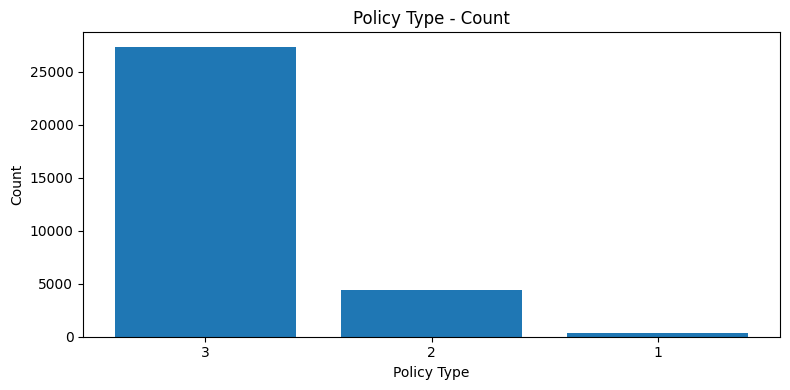

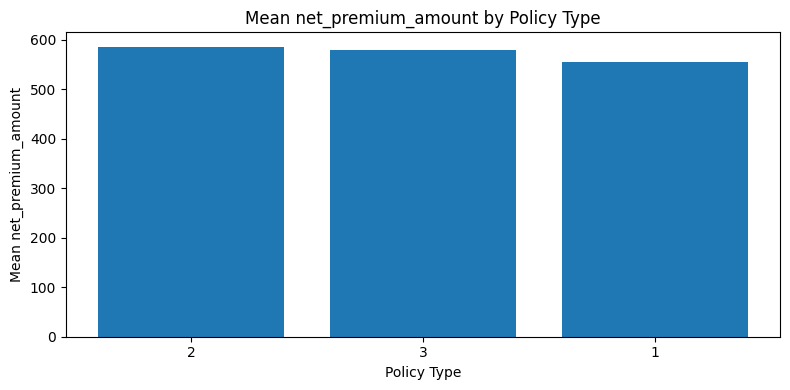

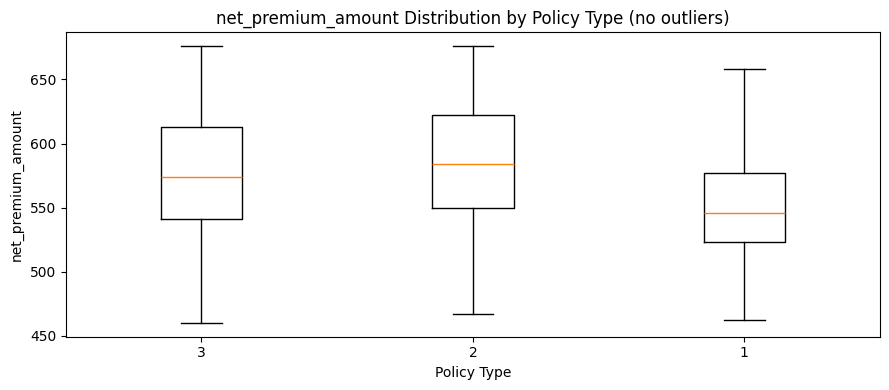

In [37]:
# Prepare data
s = training_df[feature_name]
ref_dt = pd.to_datetime(training_df[ref_date_col], errors="coerce")  # parsed for completeness
t = training_df[target_name]

# label NaN for plotting
s_plot = s.astype(object).where(s.notna(), "Missing")

# Basic stats
n = len(s); miss = s.isna().sum(); uniq = s.nunique(dropna=True)
print(f"Feature: {feature_name} -> {print_feature_name}")
print(f"Non-null: {n - miss}/{n} (missing: {miss}, {miss/n:.2%})")
print(f"Unique categories (non-null): {uniq}")
print("\nCounts (incl. Missing):")
print(s_plot.value_counts(dropna=False))

# Count bar plot
counts = s_plot.value_counts(dropna=False)
plt.figure(figsize=(8,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title(f"{print_feature_name} - Count"); plt.xlabel(print_feature_name); plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Mean target by category (ordered by mean)
df_plot = pd.DataFrame({print_feature_name: s_plot, target_name: t}).dropna(subset=[print_feature_name, target_name])
mean_target = df_plot.groupby(print_feature_name)[target_name].mean().sort_values(ascending=False)

plt.figure(figsize=(8,4))
plt.bar(mean_target.index.astype(str), mean_target.values)
plt.title(f"Mean {target_name} by {print_feature_name}")
plt.xlabel(print_feature_name); plt.ylabel(f"Mean {target_name}")
plt.tight_layout()
plt.show()

# Target distribution by category (boxplots)
# Build a list of arrays aligned with categories (use top-k if too many)
cats = counts.index.tolist()
data_by_cat = [df_plot.loc[df_plot[print_feature_name] == c, target_name].values for c in cats]

plt.figure(figsize=(9,4))
plt.boxplot(data_by_cat, labels=[str(c) for c in cats], vert=True, showfliers=False)
plt.title(f"{target_name} Distribution by {print_feature_name} (no outliers)")
plt.xlabel(print_feature_name); plt.ylabel(target_name)
plt.tight_layout()
plt.show()

In [38]:
# provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

feature_4_insights = """
Policy Type is a categorical variable with 3 categories present in the dataset: 
type 3 (passenger cars) dominates with ~85% of records, followed by type 2 (vans) and a very small group of type 1 (motorbikes). 
Boxplots show that average premiums differ slightly across policy types, with type 2 policies generally priced higher and type 1 lower. 
This suggests the feature has predictive value for premiums. 
The sample size of type 1 is small. It may require grouping or regularization in modeling.
"""

In [39]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_4_insights', value=feature_4_insights)

### C.5 Explore Feature of Interest `total_claims_number_in_history`

> You can add more cells related to other feeatures in this section

In [40]:
feature_name       = "total_claims_number_in_history"  # Historical claims count
ref_date_col       = "contract_start_date"             # Reference date (parsed for completeness)
target_name        = "net_premium_amount"              # Target variable
print_feature_name = "Historical Claims Count"

Feature: total_claims_number_in_history -> Historical Claims Count
count    32136.000000
mean         2.647498
std          3.787398
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          1.000000
75%          4.000000
95%         10.000000
99%         17.000000
max         52.000000
Name: total_claims_number_in_history, dtype: float64


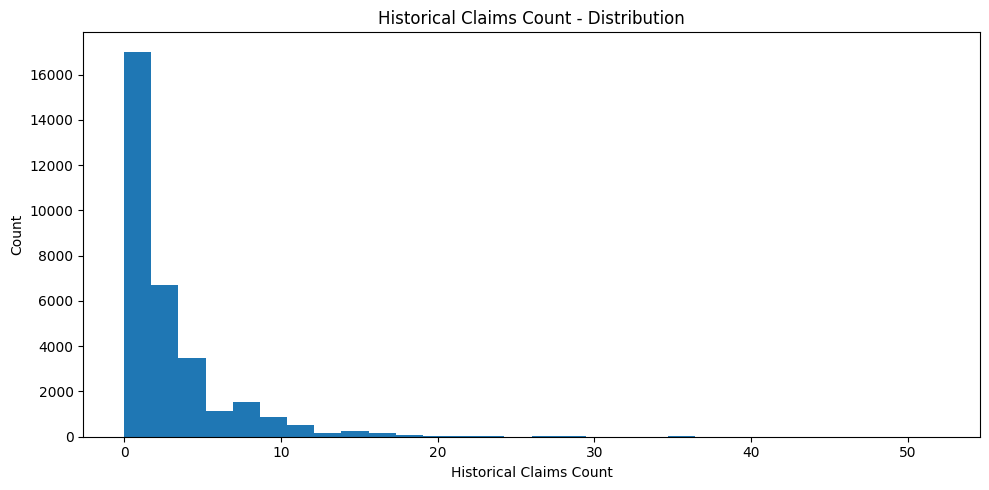

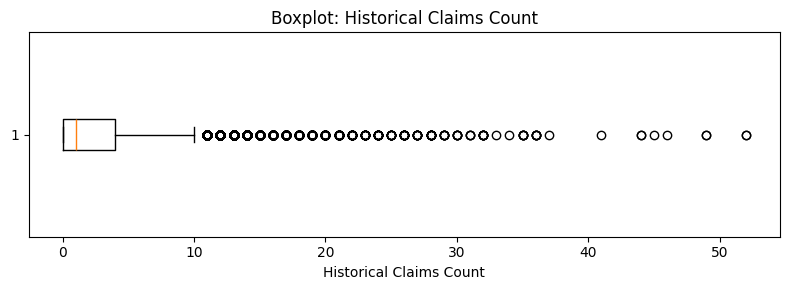

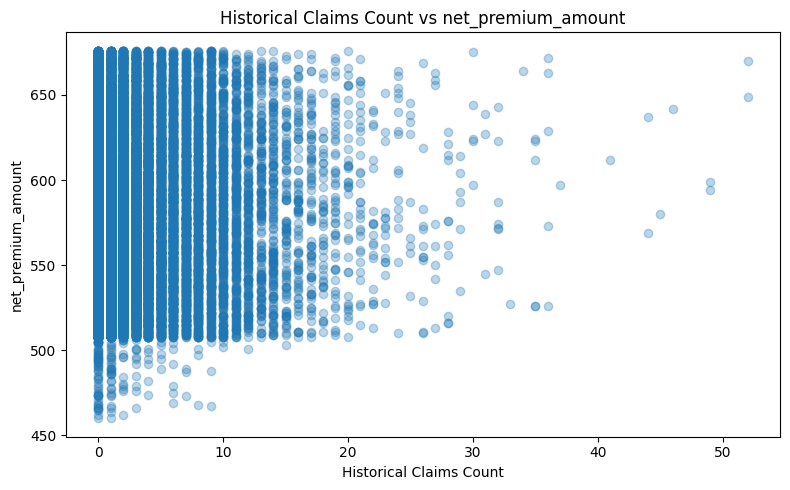

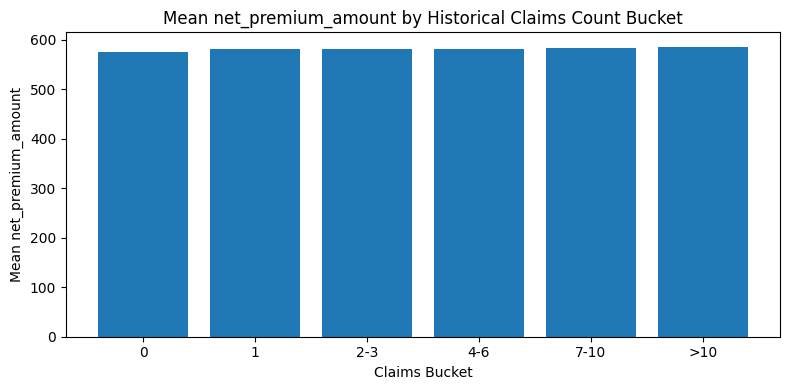

In [41]:
# Prepare data
x = pd.to_numeric(training_df[feature_name], errors="coerce")
ref_dt = pd.to_datetime(training_df[ref_date_col], errors="coerce")  # not used further, but parsed as requested
y = training_df[target_name]

# Descriptive stats
print(f"Feature: {feature_name} -> {print_feature_name}")
print(x.describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]))

# Distribution (hist + boxplot)
valid = x.dropna()
if len(valid) > 0:
    plt.figure(figsize=(10,5))
    plt.hist(valid, bins=30)
    plt.title(f"{print_feature_name} - Distribution")
    plt.xlabel(print_feature_name); plt.ylabel("Count")
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(8,3))
    plt.boxplot(valid, vert=False, showfliers=True)
    plt.title(f"Boxplot: {print_feature_name}")
    plt.xlabel(print_feature_name)
    plt.tight_layout(); plt.show()

# Relationship with target (scatter + grouped averages)
df_plot = pd.DataFrame({print_feature_name: x, target_name: y}).dropna()

# Scatter (alpha to mitigate overlap)
plt.figure(figsize=(8,5))
plt.scatter(df_plot[print_feature_name], df_plot[target_name], alpha=0.3)
plt.title(f"{print_feature_name} vs {target_name}")
plt.xlabel(print_feature_name); plt.ylabel(target_name)
plt.tight_layout(); plt.show()

# Grouped mean premium by claims buckets (bins can be adjusted)
# Buckets: 0, 1, 2–3, 4–6, 7–10, >10
bins = [-0.5, 0.5, 1.5, 3.5, 6.5, 10.5, df_plot[print_feature_name].max()+0.5]
labels = ["0", "1", "2-3", "4-6", "7-10", ">10"]
df_plot["ClaimsBucket"] = pd.cut(df_plot[print_feature_name], bins=bins, labels=labels)

mean_prem = df_plot.groupby("ClaimsBucket")[target_name].mean()
plt.figure(figsize=(8,4))
plt.bar(mean_prem.index.astype(str), mean_prem.values)
plt.title(f"Mean {target_name} by {print_feature_name} Bucket")
plt.ylabel(f"Mean {target_name}"); plt.xlabel("Claims Bucket")
plt.tight_layout(); plt.show()

In [42]:
# provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

feature_5_insights = """
Historical Claims Count(total_claims_number_in_history) has a mean of about 2.65 claims, with half of customers reporting one or fewer claims. 
The distribution is highly right-skewed, with most values clustered near zero and a few extreme outliers up to 52 claims. 
This feature is important for capturing past risk behavior, as higher claim counts usually indicate higher risk and premiums. 
Issues: There exist some extreme values(up to 52 claims), it should be capped or grouped into buckets. 
Overall, the feature is predictive but requires handling of skewness and outliers.
"""

In [43]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_5_insights', value=feature_5_insights)

### C.6 Explore Feature of Interest `vehicle_value`

> You can add more cells related to other feeatures in this section

In [44]:
feature_name       = "vehicle_value"          # Vehicle market value
ref_date_col       = "contract_start_date"    # Reference date (parsed for completeness)
target_name        = "net_premium_amount"     # Target variable
print_feature_name = "Vehicle Value"

Feature: vehicle_value -> Vehicle Value
count     32136.000000
mean      18972.391870
std        7176.732691
min         270.460000
1%         7068.000000
5%         9900.000000
25%       14093.730000
50%       18020.000000
75%       22466.050000
95%       31200.000000
99%       42746.250000
max      110000.000000
Name: vehicle_value, dtype: float64


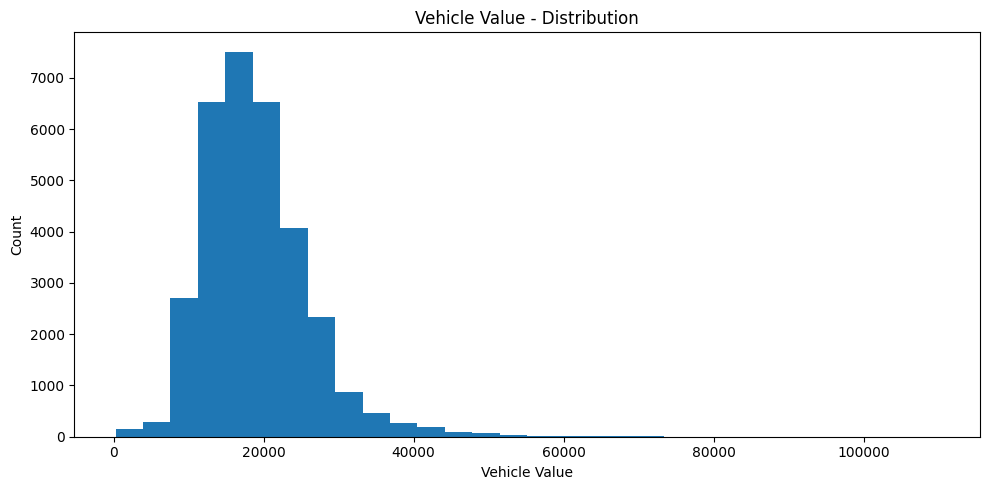

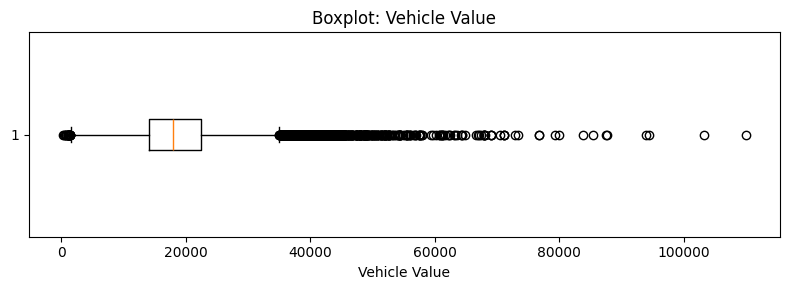

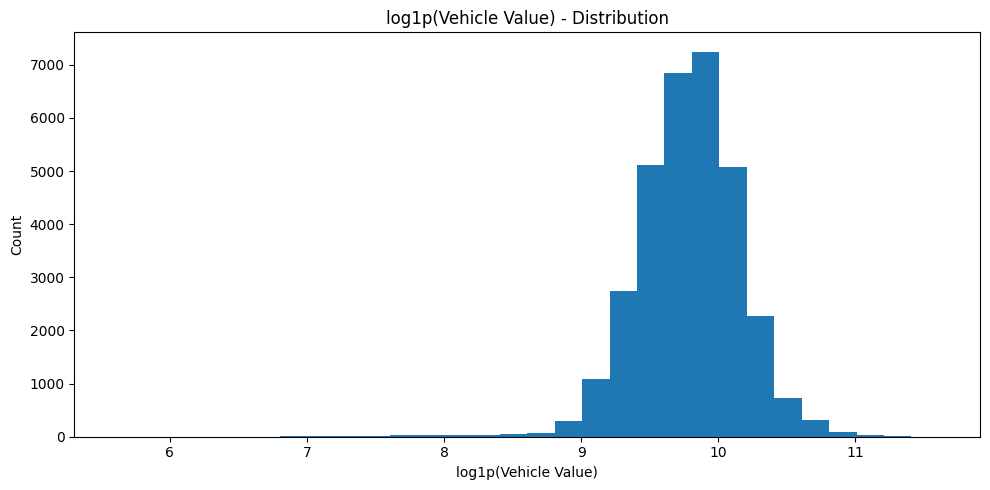

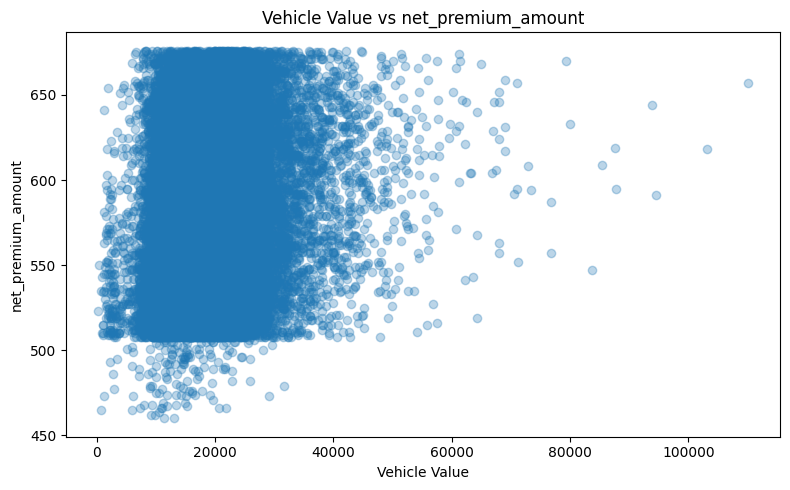

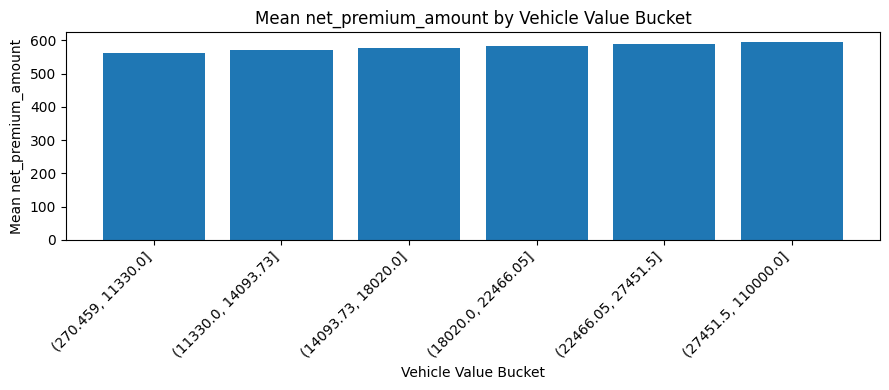

In [45]:
# Prepare data
x = pd.to_numeric(training_df[feature_name], errors="coerce")
ref_dt = pd.to_datetime(training_df[ref_date_col], errors="coerce")   # parsed to satisfy ref requirement
y = training_df[target_name]

# Descriptive stats
print(f"Feature: {feature_name} -> {print_feature_name}")
print(x.describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]))

# Quick sanity notes (no hard filtering)
if (x <= 0).any():
    print("Note: non-positive values detected; check data quality or consider imputation.")
if x.isna().any():
    print(f"Note: {x.isna().sum()} missing values; consider median/grouped imputation.")

# Distribution plots
valid = x.dropna()
if len(valid) > 0:
    # Histogram
    plt.figure(figsize=(10,5))
    plt.hist(valid, bins=30)
    plt.title(f"{print_feature_name} - Distribution")
    plt.xlabel(print_feature_name); plt.ylabel("Count")
    plt.tight_layout(); plt.show()

    # Boxplot (shows outliers)
    plt.figure(figsize=(8,3))
    plt.boxplot(valid, vert=False, showfliers=True)
    plt.title(f"Boxplot: {print_feature_name}")
    plt.xlabel(print_feature_name)
    plt.tight_layout(); plt.show()

# log1p view for right-skew
plt.figure(figsize=(10,5))
plt.hist(np.log1p(valid), bins=30)
plt.title(f"log1p({print_feature_name}) - Distribution")
plt.xlabel(f"log1p({print_feature_name})"); plt.ylabel("Count")
plt.tight_layout(); plt.show()

# Relationship with target (scatter + bucketed means)
df_plot = pd.DataFrame({print_feature_name: x, target_name: y}).dropna()

# Scatter
plt.figure(figsize=(8,5))
plt.scatter(df_plot[print_feature_name], df_plot[target_name], alpha=0.3)
plt.title(f"{print_feature_name} vs {target_name}")
plt.xlabel(print_feature_name); plt.ylabel(target_name)
plt.tight_layout(); plt.show()

# Bucketed averages using quantile-based bins (robust to skew)
qs = np.unique(np.quantile(df_plot[print_feature_name], [0, .1, .25, .5, .75, .9, 1.0]))
# ensure strictly increasing edges
bins = np.unique(qs)
if len(np.unique(bins)) < 3:
    # fallback fixed bins if quantiles collapse (rare)
        bins = [df_plot[print_feature_name].min()-1, 10000, 15000, 20000, 30000, df_plot[print_feature_name].max()+1]
df_plot["ValueBucket"] = pd.cut(df_plot[print_feature_name], bins=bins, include_lowest=True)
mean_prem = df_plot.groupby("ValueBucket")[target_name].mean()

plt.figure(figsize=(9,4))
plt.bar(mean_prem.index.astype(str), mean_prem.values)
plt.title(f"Mean {target_name} by {print_feature_name} Bucket")
plt.ylabel(f"Mean {target_name}"); plt.xlabel(f"{print_feature_name} Bucket")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.show()

In [46]:
# provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

feature_6_insights = """
Vehicle Value has an average of about 19,000 with most values ranging between 14,000 and 22,500, but extreme outliers reach up to 110,000. 
The distribution is strongly right-skewed, which was confirmed by the log transformation producing a near-normal shape. 
This feature is important because higher vehicle value generally corresponds to higher replacement cost and risk, making it highly predictive for premium pricing. 
Issues: There exist some extreme values, it should be addressed through log transformation or outlier capping.  
"""

In [47]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_6_insights', value=feature_6_insights)

### C.7 Explore Feature of Interest `matriculation_year`

> You can add more cells related to other feeatures in this section

In [48]:
feature_name       = "matriculation_year"       # Vehicle registration year (YYYY)
ref_date_col       = "contract_start_date"      # Reference date (contract start)
target_name        = "net_premium_amount"       # Target variable
print_feature_name = "Car Age (years) at Contract Start"

Feature: matriculation_year -> Car Age (years) at Contract Start
count    32136.000000
mean        15.793316
std          5.971988
min          6.000000
1%           6.000000
5%           6.000000
25%         11.000000
50%         16.000000
75%         20.000000
95%         25.000000
99%         30.000000
max         70.000000
dtype: float64


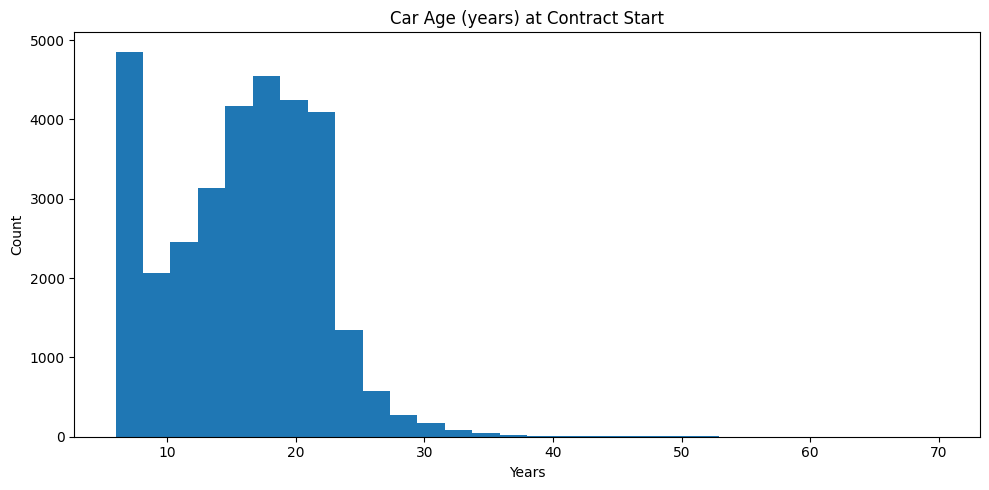

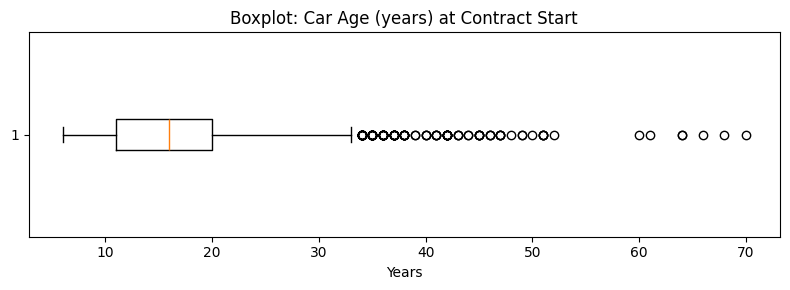

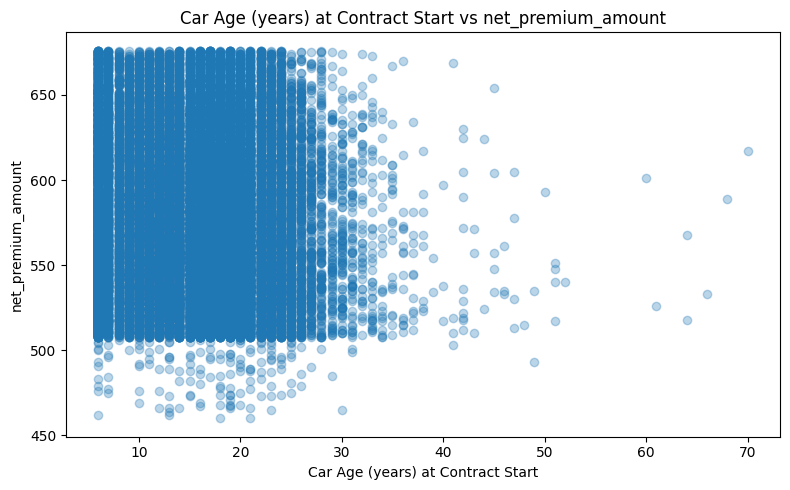

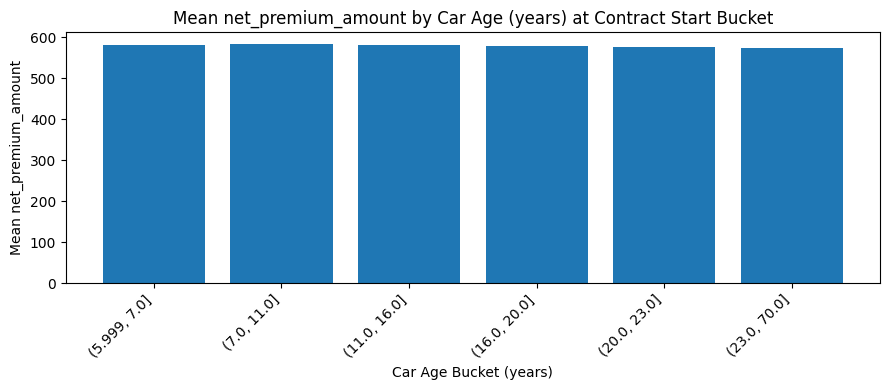

In [49]:
# Prepare data
year = pd.to_numeric(training_df[feature_name], errors="coerce")
ref  = pd.to_datetime(training_df[ref_date_col], errors="coerce")

# Compute car age at contract start (allow NaNs)
car_age = (ref.dt.year - year).where(year.notna() & ref.notna(), np.nan)

# Descriptive stats
print(f"Feature: {feature_name} -> {print_feature_name}")
print(car_age.describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]))
if (car_age < 0).any():  print("Note: negative car ages exist (check registration vs contract dates).")

# Distribution plots
valid = car_age.dropna()
plt.figure(figsize=(10,5))
plt.hist(valid, bins=30)
plt.title(print_feature_name)
plt.xlabel("Years"); plt.ylabel("Count")
plt.tight_layout(); plt.show()

plt.figure(figsize=(8,3))
plt.boxplot(valid, vert=False)
plt.title(f"Boxplot: {print_feature_name}")
plt.xlabel("Years")
plt.tight_layout(); plt.show()

# Relationship with target (scatter + bucketed means)
df_plot = pd.DataFrame({print_feature_name: car_age, target_name: training_df[target_name]}).dropna()

# Scatter
plt.figure(figsize=(8,5))
plt.scatter(df_plot[print_feature_name], df_plot[target_name], alpha=0.3)
plt.title(f"{print_feature_name} vs {target_name}")
plt.xlabel(print_feature_name); plt.ylabel(target_name)
plt.tight_layout(); plt.show()
# Quantile buckets (robust to skew)
qs = np.unique(np.quantile(df_plot[print_feature_name], [0, .1, .25, .5, .75, .9, 1.0]))
if len(qs) < 3:  # fallback if degenerate
    qs = [df_plot[print_feature_name].min()-1, 3, 5, 10, 15, 20, df_plot[print_feature_name].max()+1]
df_plot["AgeBucket"] = pd.cut(df_plot[print_feature_name], bins=qs, include_lowest=True)
mean_prem = df_plot.groupby("AgeBucket")[target_name].mean()

plt.figure(figsize=(9,4))
plt.bar(mean_prem.index.astype(str), mean_prem.values)
plt.title(f"Mean {target_name} by {print_feature_name} Bucket")
plt.ylabel(f"Mean {target_name}"); plt.xlabel("Car Age Bucket (years)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.show()

In [50]:
# provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

feature_7_insights = """
Car Age (years) at Contract Start has a mean of about 16 years, with most vehicles between 11 and 20 years old. 
The distribution is moderately right-skewed, with a few very old vehicles up to 70 years that may be data anomalies or rare cases. 
A limitation is that car age may correlate with vehicle value, multicollinearity should be considered. 
Extreme values should be reviewed, and the feature may be more useful in bucketed form rather than as a raw continuous variable.
"""

In [51]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_7_insights', value=feature_7_insights)

### C.8 Explore Feature of Interest `vehicle_fuel_type`

> You can add more cells related to other feeatures in this section

In [52]:
feature_name       = "vehicle_fuel_type"       # Fuel type (e.g., Petrol/Diesel)
ref_date_col       = "contract_start_date"     # Reference date (parsed for completeness)
target_name        = "net_premium_amount"      # Target variable
print_feature_name = "Vehicle Fuel Type"

Feature: vehicle_fuel_type -> Vehicle Fuel Type
Counts (incl. Missing):
vehicle_fuel_type
D          21450
P          10608
Missing       78
Name: count, dtype: int64


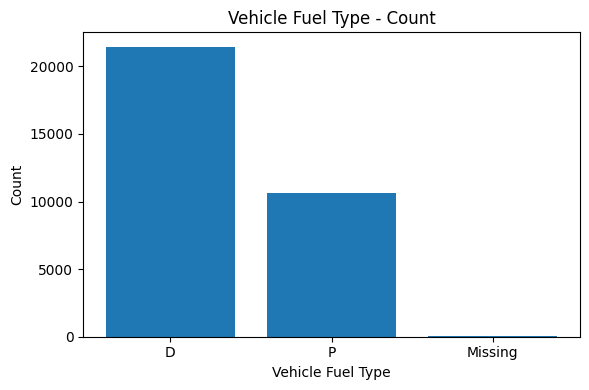

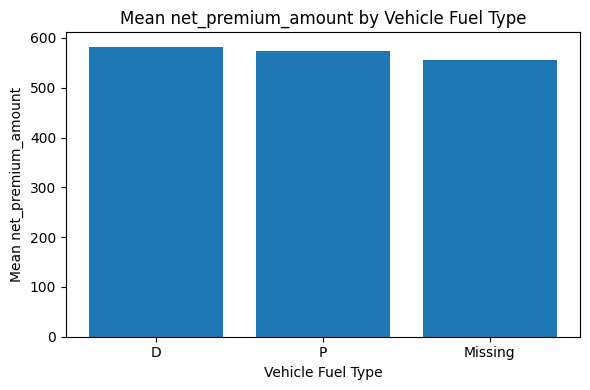

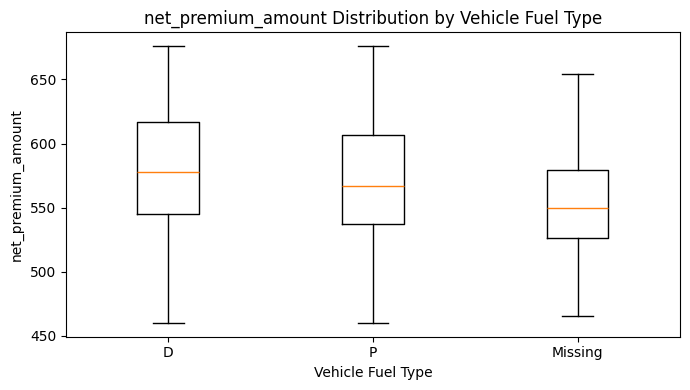

In [53]:
# Prepare data
s = training_df[feature_name].astype(str).where(training_df[feature_name].notna(), "Missing")
ref_dt = pd.to_datetime(training_df[ref_date_col], errors="coerce")  # parsed but unused
y = training_df[target_name]

# Basic stats
print(f"Feature: {feature_name} -> {print_feature_name}")
print("Counts (incl. Missing):")
print(s.value_counts())

# Count bar plot
counts = s.value_counts()
plt.figure(figsize=(6,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title(f"{print_feature_name} - Count")
plt.xlabel(print_feature_name); plt.ylabel("Count")
plt.tight_layout(); plt.show()

# Mean premium by fuel type
df_plot = pd.DataFrame({print_feature_name: s, target_name: y}).dropna()
mean_target = df_plot.groupby(print_feature_name)[target_name].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
plt.bar(mean_target.index.astype(str), mean_target.values)
plt.title(f"Mean {target_name} by {print_feature_name}")
plt.xlabel(print_feature_name); plt.ylabel(f"Mean {target_name}")
plt.tight_layout(); plt.show()

# Premium distribution by category (boxplot)
groups = [df_plot.loc[df_plot[print_feature_name] == cat, target_name].values for cat in mean_target.index]

plt.figure(figsize=(7,4))
plt.boxplot(groups, labels=mean_target.index.astype(str), showfliers=False)
plt.title(f"{target_name} Distribution by {print_feature_name}")
plt.xlabel(print_feature_name); plt.ylabel(target_name)
plt.tight_layout(); plt.show()

In [54]:
# provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

feature_8_insights = """
The feature Vehicle Fuel Type is dominated by Diesel (≈67%) and Petrol (≈33%), with very few missing cases. 
The distribution of premiums shows Diesel vehicles having slightly higher average premiums than Petrol. 
The Missing group is lower but very small in size. 
Issues: there exist small number of missing values, which may be treated as a separate category or imputed. 
"""

In [55]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_8_insights', value=feature_8_insights)